In [1]:
%matplotlib notebook
import common
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
from scipy.interpolate import interp2d
from datetime import datetime

In [2]:
df = common.load_data(nrows=1000000)

Executing: load_data
With Args: None
With Kwargs: 
	nrows : 1000000
Result: <class 'pandas.core.frame.DataFrame'>
Execution Duration: 26.8546659946 seconds



<IPython.core.display.Javascript object>


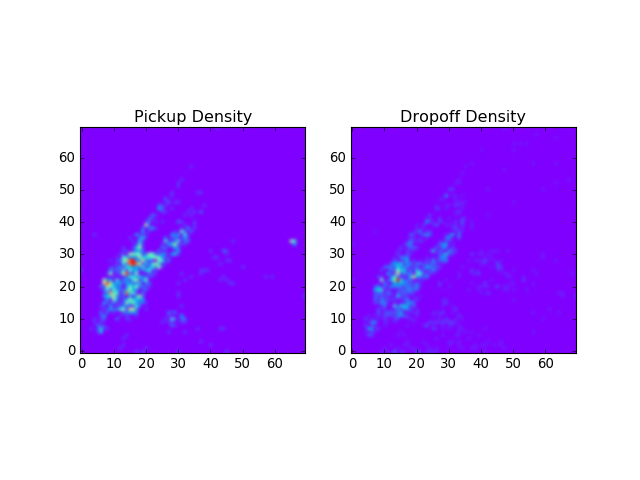

In [26]:
def plot_density(df, start_dt, end_dt, rtype, n_bins):
    params = {"dropoff" : ("dropoff_datetime", "Dropoff Density",
                           common.get_dropoff_geos),
              "pickup": ("pickup_datetime", "Pickup Density",
                         common.get_pickup_geos)}
    ttype, tle, efunc = params[rtype]
    sdf = common.query_dates(df, start_dt, end_dt, ttype) 
    data = efunc(sdf)
    hm, _, _ = np.histogram2d(data[:, 0], data[:, 1], bins=n_bins)
    plt.title(tle)
    plt.imshow(hm, interpolation="bicubic", origin="lower", cmap="rainbow")
    #plt.colorbar()
    plt.show()


def make_density_plots():
    start_dt = datetime(2014, 1, 9, 0, 0)
    end_dt = datetime(2014, 1, 9, 0, 30)
    plt.subplot(1, 2, 1)
    plot_density(df, start_dt, end_dt, "pickup", 70)
    plt.subplot(1, 2, 2)
    plot_density(df, start_dt, end_dt, "dropoff", 70)

    
make_density_plots()